# Data Pre-processing

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4609    0  4609    0     0  15213      0 --:--:-- --:--:-- --:--:-- 15211
100  517k  100  517k    0     0   790k      0 --:--:-- --:--:-- --:--:--  790k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4621    0  4621    0     0  18119      0 --:--:-- --:--:-- --:--:-- 18192
100  392k  100  392k    0     0   691k      0 --:--:-- --:--:-- --:--:-- 3244k


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Nifty.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-15,16010.799805,16066.950195,15927.299805,16049.200195,16049.200195,205800
1,2022-07-18,16151.400391,16287.950195,16142.200195,16278.500000,16278.500000,227700
2,2022-07-19,16187.049805,16359.500000,16187.049805,16340.549805,16340.549805,222600
3,2022-07-20,16562.800781,16588.000000,16490.949219,16520.849609,16520.849609,284400
4,2022-07-21,16523.550781,16626.949219,16483.900391,16605.250000,16605.250000,243600
...,...,...,...,...,...,...,...
242,2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200
243,2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300
244,2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900
245,2023-07-13,19495.199219,19567.000000,19385.800781,19413.750000,19413.750000,310400


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['DoW'] = df['Date'].dt.weekday/6
df.sort_values(['Date'], inplace=True)

In [ ]:
def add_features(t_df):
    # Returns in the last t intervals
    for t in range(1, 11):
        t_df[f'ret{t}'] = t_df['Close'].div(t_df['Open'].shift(t-1)).sub(1)
    # Simple Moving Average based features
        t_df['sma'] = talib.SMA(t_df['Close'])
        t_df['5sma'] = talib.SMA(t_df['Close'], timeperiod=5)
        t_df['20sma'] = talib.SMA(t_df['Close'], timeperiod=20)
    t_df['sma_buy'] = np.where((t_df['Close'] < t_df['5sma']), 1, 0)
    return t_df

In [ ]:
updated_df = add_features(df)


In [ ]:
updated_df

,Date,Open,High,Low,Close,Adj Close,Volume,DoW,ret1,sma,...,ret2,ret3,ret4,ret5,ret6,ret7,ret8,ret9,ret10,sma_buy
0,2022-07-15,16010.799805,16066.950195,15927.299805,16049.200195,16049.200195,205800,0.666667,0.002398,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2022-07-18,16151.400391,16287.950195,16142.200195,16278.500000,16278.500000,227700,0.000000,0.007869,NaN,...,0.016720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2022-07-19,16187.049805,16359.500000,16187.049805,16340.549805,16340.549805,222600,0.166667,0.009483,NaN,...,0.011711,0.020595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2022-07-20,16562.800781,16588.000000,16490.949219,16520.849609,16520.849609,284400,0.333333,-0.002533,NaN,...,0.020621,0.022874,0.031857,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2022-07-21,16523.550781,16626.949219,16483.900391,16605.250000,16605.250000,243600,0.500000,0.004944,NaN,...,0.002563,0.025835,0.028100,0.037128,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,0.000000,-0.002291,18844.138411,...,-0.003444,-0.001537,-0.002579,-0.002612,0.005684,0.014628,0.023680,0.032394,0.036053,1
243,2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,0.166667,0.000633,18872.163411,...,0.002013,0.000855,0.002770,0.001724,0.001690,0.010023,0.019005,0.028096,0.036848,0
244,2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,0.333333,-0.005803,18897.178451,...,-0.002203,-0.000827,-0.001982,-0.000072,-0.001116,-0.001149,0.007160,0.016116,0.025182,1
245,2023-07-13,19495.199219,19567.000000,19385.800781,19413.750000,19413.750000,310400,0.500000,-0.004178,18926.490104,...,-0.004293,-0.000687,0.000691,-0.000466,0.001447,0.000402,0.000368,0.008690,0.017660,0


# Reinforced Q-Learning


In [ ]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import random
import torch.nn.functional as F

data = updated_df

# Define the trading environment
class StockTradingEnvironment:
    def __init__(self, data, initial_balance=1e7):
        self.data = data
        self.balance = initial_balance
        self.shares_held = 0
        self.current_step = 0
        self.max_steps = len(data) - 1

    def reset(self):
        self.balance = 1e7
        self.shares_held = 0
        self.current_step = 0
        return self.get_state()

    def get_state(self):
        if self.current_step >= self.max_steps:
            return None

        state = [
            self.balance / 1e7,
            self.shares_held,
            self.data['Close'].values[self.current_step] / self.data['Close'].values[0]
        ]
        return torch.Tensor(state)

    def take_action(self, action):
        current_price = self.data['Close'].values[self.current_step]

        if action == 0:  # Buy
            max_shares = int(self.balance / current_price)
            if max_shares>0:
                shares_to_buy = random.randint(1, max_shares)
                self.shares_held += shares_to_buy
                self.balance -= shares_to_buy * current_price
        elif action == 1:  # Sell
            if self.shares_held>0:

                shares_to_sell = random.randint(1, self.shares_held)
                self.shares_held -= shares_to_sell
                self.balance += shares_to_sell * current_price

        self.current_step += 1
        next_state = self.get_state()
        return next_state

# Define a simple Q-network
class QNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.l1 = nn.Linear(64,128)
        self.l2 = nn.Linear(128,64)
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        x = F.softmax(self.fc2(x),dim=-1)
        return x

# Initialize the environment and Q-network
env = StockTradingEnvironment(data)
state_size = len(env.get_state())
action_size = 2  # Buy, Sell, Hold
q_network = QNetwork(state_size, action_size)
optimizer = optim.Adam(q_network.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training parameters
num_episodes = 1000
max_steps = len(data) - 2
gamma = 0.99  # Discount factor
epsilon = 0.2  # Exploration probability

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    optimizer.zero_grad()
    episode_reward = 0
    rewards = []
    target = 0
    while state is not None:
        # Epsilon-greedy policy
        if random.random() < epsilon:
            action = random.randint(0, action_size - 1)
        else:
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()

        next_state = env.take_action(action)
        if next_state is not None:
            reward = (next_state[2] - state[2])*(1/2-action)  # Profit/loss as the reward
            episode_reward += reward
            target += abs(next_state[2] - state[2])
        # else:

        #     target = reward
        state = next_state
    loss = criterion(torch.tensor(episode_reward,requires_grad=True), target)
    # print(loss)
    loss.backward()
    optimizer.step()


    print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {episode_reward:.2f}")
    rewards.append(episode_reward)

# Evaluate the trained agent (optional)
state = env.reset()
total_reward = 0

while state is not None:
    with torch.no_grad():
        q_values = q_network(state)
        print(q_values)
        action = torch.argmax(q_values).item()
    next_state = env.take_action(action)
    if next_state is not None:
      print((next_state[2] - state[2])*(1/2-action))
    total_reward += (next_state[2] - state[2])*(1/2-action) if next_state is not None else 0
    state = next_state

print(sum(rewards)/len(rewards))

print(f"Total Reward: {total_reward:.2f}")

<ipython-input-11-e704a29cf599>:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(torch.tensor(episode_reward,requires_grad=True), target)


Episode 1/1000, Total Reward: -0.07
Episode 2/1000, Total Reward: -0.06
Episode 3/1000, Total Reward: -0.03
Episode 4/1000, Total Reward: 0.01
Episode 5/1000, Total Reward: -0.07
Episode 6/1000, Total Reward: -0.11
Episode 7/1000, Total Reward: -0.12
Episode 8/1000, Total Reward: -0.03
Episode 9/1000, Total Reward: -0.05
Episode 10/1000, Total Reward: -0.04
Episode 11/1000, Total Reward: -0.08
Episode 12/1000, Total Reward: -0.15
Episode 13/1000, Total Reward: -0.03
Episode 14/1000, Total Reward: -0.13
Episode 15/1000, Total Reward: -0.09
Episode 16/1000, Total Reward: -0.03
Episode 17/1000, Total Reward: 0.01
Episode 18/1000, Total Reward: -0.07
Episode 19/1000, Total Reward: -0.01
Episode 20/1000, Total Reward: -0.07
Episode 21/1000, Total Reward: 0.02
Episode 22/1000, Total Reward: -0.03
Episode 23/1000, Total Reward: 0.07
Episode 24/1000, Total Reward: -0.05
Episode 25/1000, Total Reward: -0.07
Episode 26/1000, Total Reward: -0.11
Episode 27/1000, Total Reward: 0.00
Episode 28/1000

# LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
price = updated_df[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback)

import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)




<ipython-input-16-bd62a7382b30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))


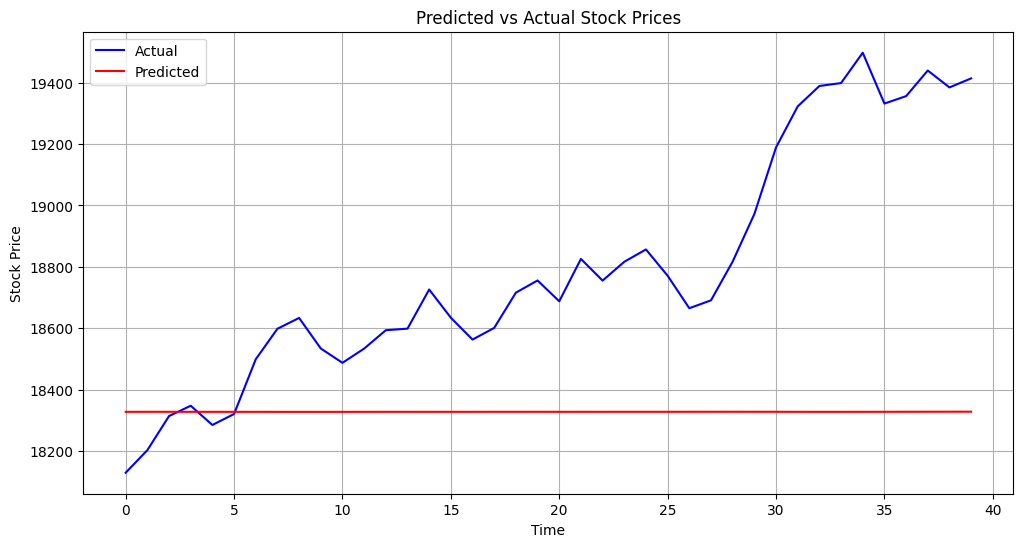

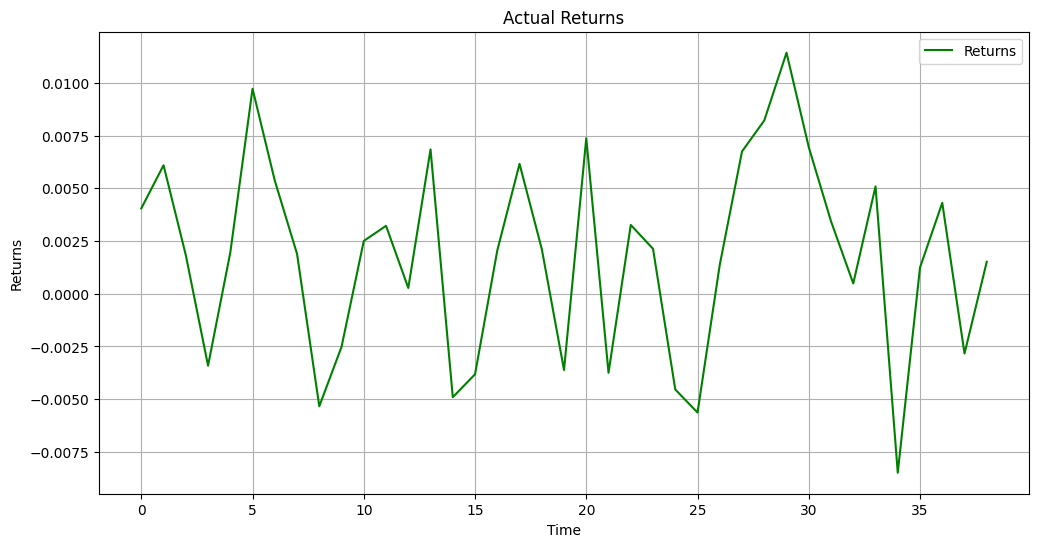

In [ ]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    y_test_pred = model(x_test)

# Inverse transform the predicted values to get actual stock prices
y_test_pred = scaler.inverse_transform(y_test_pred.numpy())
y_test_actual = scaler.inverse_transform(y_test)

# Calculate the returns from actual stock prices
returns_actual = (y_test_actual[1:] - y_test_actual[:-1]) / y_test_actual[:-1]

# Plot predicted stock prices
plt.figure(figsize=(12, 6))
plt.title('Predicted vs Actual Stock Prices')
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Plot returns
plt.figure(figsize=(12, 6))
plt.title('Actual Returns')
plt.plot(returns_actual, label='Returns', color='green')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()

In [ ]:
total_reward = returns_actual.sum()

# Output the total reward
print("Total Reward:", total_reward)

Total Reward: 0.059776959253524296


# ARIMA

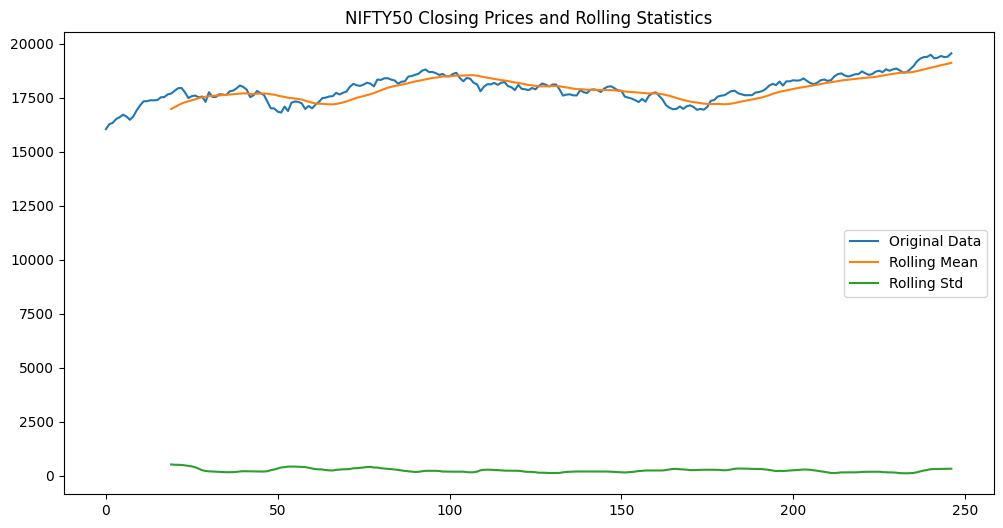

ADF Test Results:
ADF Statistic: -1.9023864758187004
p-value: 0.3309392713819327
Critical Values:
  1%: -3.457215237265747
  5%: -2.873361841566324
  10%: -2.5730700760129555


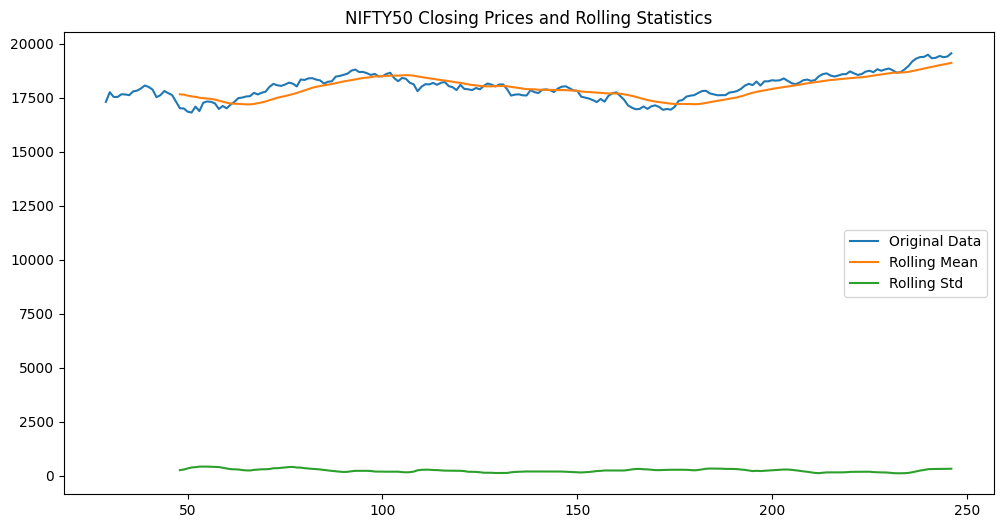

ADF Test Results:
ADF Statistic: -0.7350802566693135
p-value: 0.8374525461837453
Critical Values:
  1%: -3.460849270544952
  5%: -2.87495318813585
  10%: -2.5739190539191745


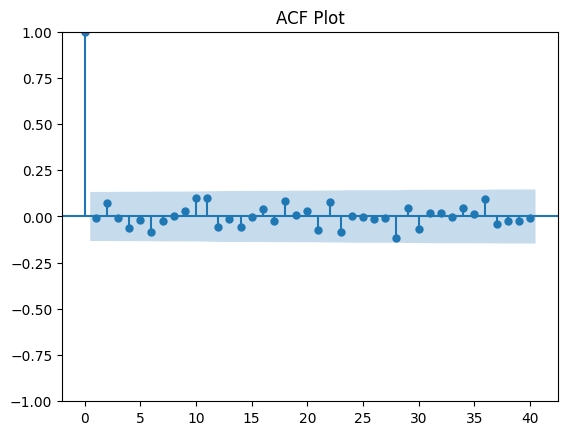

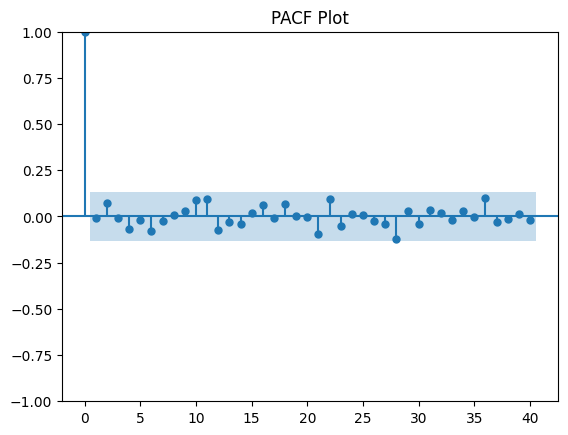

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  218
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1361.590
Date:                Sun, 03 Sep 2023   AIC                           2729.180
Time:                        18:42:46   BIC                           2739.319
Sample:                             0   HQIC                          2733.276
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3538      0.890      0.397      0.691      -1.391       2.099
ma.L1         -0.2845      0.905     -0.314      0.753      -2.057       1.488
sigma2      1.657e+04   1423.137     11.643      0.0

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load NIFTY50 data from a CSV file (replace 'nifty50_data.csv' with your data file)
nifty50_data = updated_df

# Check if the data needs differencing to achieve stationarity
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('NIFTY50 Closing Prices and Rolling Statistics')
    plt.show()

    # Perform Dickey-Fuller test for stationarity
    adf_test = adfuller(data['Close'], autolag='AIC')
    print('ADF Test Results:')
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print(f'Critical Values:')
    for key, value in adf_test[4].items():
        print(f'  {key}: {value}')

check_stationarity(nifty50_data)

# Differencing to achieve stationarity (if needed)
nifty50_data['Close_diff'] = nifty50_data['Close'] - nifty50_data['Close'].shift(1)
nifty50_data.dropna(inplace=True)

# Check stationarity of the differenced series
check_stationarity(nifty50_data)

# Plot ACF and PACF for parameter selection
plot_acf(nifty50_data['Close_diff'], lags=40, title='ACF Plot')
plot_pacf(nifty50_data['Close_diff'], lags=40, title='PACF Plot')
plt.show()

# Fit an ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = sm.tsa.ARIMA(nifty50_data['Close'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

# Forecast future values (example: 10 steps ahead)
forecast_steps = 10
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data['Close'], label='Original Data')
plt.plot(pd.date_range(start=nifty50_data.index[-1], periods=forecast_steps + 1, closed='right'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(start=nifty50_data.index[-1], periods=forecast_steps + 1, closed='right'), forecast - stderr, forecast + stderr, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NIFTY50 ARIMA Forecast')
plt.legend()
plt.show()